In [ ]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.metrics import r2_score

from matplotlib import pyplot

In [ ]:
numpy.random.seed(7)

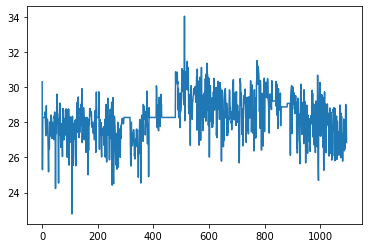

In [10]:
dataframe = pandas.read_csv('DataSet_rata-rata(2).csv', usecols=[1], engine='python', skipfooter=0)
dataset = dataframe.values
dataset = dataset.astype('float32')

#print (dataframe)
#print (dataset)

plt.plot(dataset)

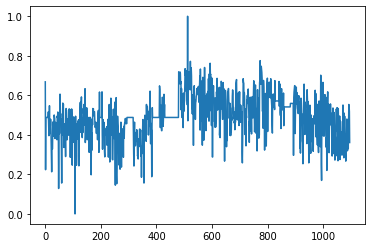

In [33]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#print(dataset)
plt.plot(dataset)

In [12]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

734 362


In [13]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
#    dataX = []
    for i in range(len(dataset) - look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
#    return numpy.array(dataX)

In [38]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#trainX = create_dataset(train)
#testX = create_dataset(test)


#print (testX)
#print (testY)
print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

731
731
359
359


In [15]:
#dari CNN
#trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1).astype('float32')
#testX = testX.reshape(testX.shape[0], testX.shape[1], 1).astype('float32')


trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print (numpy.shape(trainX))

#print (testX)

(731, 1, 2)


In [16]:
#print(numpy.ravel(trainX), numpy.ravel(trainY))
#print(numpy.ravel(testX), numpy.ravel(testY))

In [17]:
#sequential
#embedding
#LSTM
#drop out
#LSTM
#drop out
#dense

In [18]:
model = Sequential()
#model.add(Embedding(3, 3, input_length=10))

model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dropout(1))
model.add(Dense(1))

#model.add(LSTM(16, input_shape=(1, look_back)))
#model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae', 'mape', 'accuracy'])

print(model.summary())

fit = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=32, verbose=2)

#fit = model.fit(trainX, validation_data=(testX), epochs=50, batch_size=32, verbose=2)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1840      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 731 samples, validate on 359 samples
Epoch 1/15
 - 1s - loss: 0.1737 - mean_squared_error: 0.1737 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 82981.7530 - acc: 0.0014 - val_loss: 0.1427 - val_mean_squared_error: 0.1427 - val_mean_absolute_error: 0.

In [19]:
#model = Sequential()
#model.add(Embedding(vocab_size, 100, input_length=max_length))
#model.add(Embedding(100, 100))
#model.add(LSTM(20, return_sequences=True, dropout=0.5, recurrent_dropout=0.2, input_shape=(input_length, 1)))
#model.add(LSTM(20, input_shape=(1, look_back), return_sequences=True, dropout=0.5, recurrent_dropout=0.2))
#model.add(LSTM(20, return_sequences=True, dropout=0.5, recurrent_dropout=0.2))

#model.add(LSTM(10, activation='relu'))

#model.add(LSTM(10))

#model.add(Dense(10, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())
#fit = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32, verbose=2)

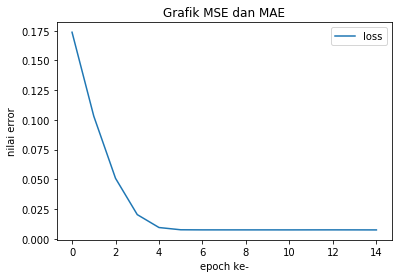

In [20]:
pyplot.plot (fit.history['loss'], label="loss")
#pyplot.plot (fit.history['acc'], label="val_loss")

#pyplot.plot (fit.history['mean_squared_error'], label="MSE")
#pyplot.plot (fit.history['mean_absolute_error'], label="MAE")

#pyplot.show()
#pyplot.plot (fit.history['val_mean_squared_error'], label="val_MSE")

plt.title('Grafik MSE dan MAE')
plt.xlabel("epoch ke-")
plt.ylabel("nilai error")

pyplot.legend()
#pyplot.savefig('error.png')
pyplot.show()


In [21]:
performansi = model.evaluate(testX, testY, verbose=0)

#performansi = model.evaluate(testX, verbose=0)

print (performansi)
#print("accuracy: %.2f%%" % (akurasi[1]*100))
#print ("akurasi MSE: %.2f%%" % (100-akurasi[1]))
#print ("MAPE = %.2f%%" % (MAPE))

#r2 = r2_score (testX[:,0], testY)
#print (r2)

#r2_ = r2_score (testX[:,0], testY[0])
#print (r2_)

[0.008246159427449065, 0.008246159427449065, 0.07254576569936734, 16.425565005012874, 0.0]


In [22]:
#mae = sklearn.metrics.mean_absolute_error (testX, testY, verbose=0)
#print ("MAE:  %.2f%%" % (mae[1]))

In [23]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])

test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])

train_score = math.sqrt(mean_squared_error(trainY[0], train_predict[:,0]))
print('TRAIN SCORE: %.2f RMSE' % (train_score))

test_score = math.sqrt(mean_squared_error(testY[0], test_predict[:,0]))
print('TEST SCORE:  %.2f RMSE' %(test_score))

#train_score_1 = mean_absolute_error(trainY[0], train_predict[:,0])
#print('train MAE: %.2f' %(train_score_1)')

TRAIN SCORE: 0.98 RMSE
TEST SCORE:  1.02 RMSE


In [24]:
#r2_ = r2_score (testX[:,0], test_predict)
#print (r2_)

#r2__ = r2_score (testX[0], test_predict[:,0])
#print (r2__)

In [25]:
ravelTestPredict = numpy.ravel(test_predict)
print(numpy.shape(ravelTestPredict))

print (ravelTestPredict)

raveltestX = numpy.ravel(testY)
print(numpy.shape(raveltestX))

print (raveltestX)

(359,)
[27.978283 27.93214  28.614603 28.870644 28.604408 28.793495 28.379766
 27.87736  28.309614 28.631294 28.858978 28.52762  28.290754 28.365608
 28.876368 29.32526  29.013472 28.476116 27.964392 28.089989 28.716143
 29.19049  28.686857 28.528461 27.986948 28.060944 28.030363 27.43861
 28.605907 29.14196  28.457256 28.462105 28.791153 27.965134 27.682234
 27.723192 28.909645 29.431894 29.899347 29.720259 29.391348 29.574842
 29.831755 29.828197 29.726446 29.555529 28.75864  28.466599 28.584326
 28.123232 29.01926  29.274664 28.813278 28.715942 27.655727 28.530905
 28.768454 28.039076 28.689634 28.41395  27.60365  27.837482 28.20055
 29.046833 29.465956 28.285109 28.60763  29.11774  29.325214 29.07889
 28.919449 29.25     29.347933 29.213245 29.28381  29.010271 29.327032
 29.26583  28.989302 28.781406 28.62196  28.173895 27.853582 28.57824
 28.85905  28.967709 28.939638 28.679598 28.840206 28.725746 28.555435
 29.179714 28.966572 28.790726 28.790726 28.790726 28.790726 28.790726
 28

In [26]:
train_predict_plot = numpy.empty_like(dataset)
train_predict_plot[:, :] = numpy.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = numpy.empty_like(dataset)
test_predict_plot[:, :] = numpy.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(dataset)-1, :] = test_predict


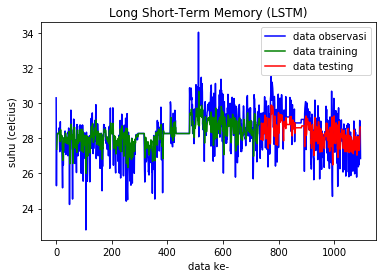

In [27]:
plt.plot(scaler.inverse_transform(dataset),'b', label="data observasi")
plt.plot(train_predict_plot,'g', label="data training")
plt.plot(test_predict_plot,'r', label="data testing")
plt.title('Long Short-Term Memory (LSTM)')
plt.xlabel("data ke-")
plt.ylabel("suhu (celcius)")
plt.legend()
#plt.savefig('LSTM_adamm.png')
plt.show()

In [32]:
akurasi = model.evaluate (trainY, test_predict_plot, batch_size = 32, verbose=2)
#print (akurasi)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (1, 731)

In [ ]:
#print (train_predict)

In [ ]:
#print (test_predict)

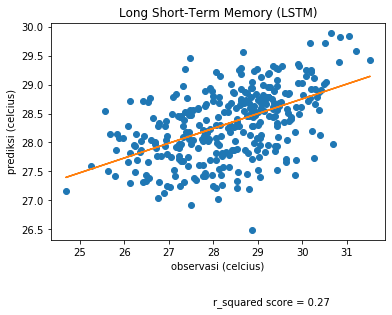

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(raveltestX,ravelTestPredict)
line = slope*raveltestX+intercept
r_squared = r2_score (raveltestX, ravelTestPredict)

fig = plt.figure()
ax = fig.subplots()
ax.plot(raveltestX, ravelTestPredict,'o', raveltestX, line)
ax.set_title('Long Short-Term Memory (LSTM)')
ax.set_xlabel('observasi (celcius)')
ax.set_ylabel('prediksi (celcius)')
fig.text(.5,-0.1,'r_squared score = %.2f' % (r_squared))
#plt.savefig('scater-plot-LSTM_adam.png')

plt.show()
plt.close()